This notebook shows how to upsample a signal by performing zero padding
in frequency space, using either the FFT, DCT or DST.

By looking at the upsampled signal, the implicit boundary condition of 
each transform is clear:
- the FFT assumes circulant boundaries, and the upsampled signal wraps
  around the field of view.
- the DCT-2 assumes reflective boundaries, and the upsampled signal has
  zero derivatives at the boundaries (Neumann).
- the DST-2 assumes antireflective boundaries, and the upsampled signal
  has zero values at the boundaries (Dirichlet).

In [15]:
import torch
from torch.fft import fftn, ifftn, fftshift, ifftshift
from bounds import dctn2, dstn2, idctn2, idstn2, pad
import matplotlib.pyplot as plt

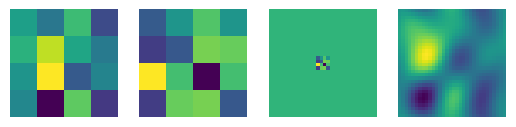

In [19]:
# Spatial signal
torch.manual_seed(1234)
x = torch.randn([4, 4])

# Fourier coefficients
k = ifftshift(fftn(fftshift(x, dim=[0, 1]), dim=[0, 1]), dim=[0, 1])

# Zero-padded coefficients
kz = pad(k, [14, 14], side='both')

# Back to spatial signal
y = ifftshift(ifftn(fftshift(kz, dim=[0, 1]), dim=[0, 1]), dim=[0, 1]).real

plt.subplot(1, 4, 1)
plt.imshow(x)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(k.real)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(kz.real)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(y)
plt.axis('off')
plt.show()

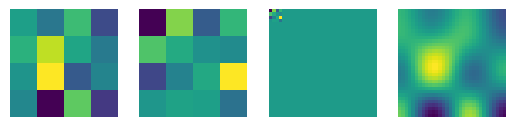

In [20]:
# Spatial signal
torch.manual_seed(1234)
x = torch.randn([4, 4])

# Fourier coefficients
k = dctn2(x, dim=[0, 1])

# Zero-padded coefficients
kz = pad(k, [28, 28], side='post')

# Back to spatial signal
y = idctn2(kz, dim=[0, 1])

plt.subplot(1, 4, 1)
plt.imshow(x)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(k)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(kz)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(y)
plt.axis('off')
plt.show()

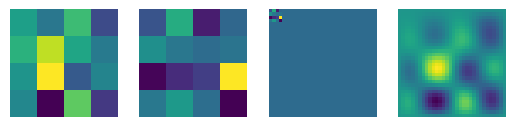

In [21]:
# Spatial signal
torch.manual_seed(1234)
x = torch.randn([4, 4])

# Fourier coefficients
k = dstn2(x, dim=[0, 1])

# Zero-padded coefficients
kz = pad(k, [28, 28], side='post')

# Back to spatial signal
y = idstn2(kz, dim=[0, 1])

plt.subplot(1, 4, 1)
plt.imshow(x)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(k)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(kz)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(y)
plt.axis('off')
plt.show()